#Loan Approval

---
**Objective:**
In this exercise, we will explore a dataset of Loan data with the below info. We will try later to predict the status of loan for individuals based the following information.</font>

## DataSet Description

- **Loan_ID:** data set unique ID <br>
- **Gender:** individual gender<br>
- **Married:** individual marital status<br>
- **Dependents:** number of dependents<br>
- **Education:** individual education status<br>
- **Self_Employed:** individual employment status<br>
- **ApplicantIncome:** individual income<br>
- **CoapplicantIncome:** individual Coapplicant income<br>
- **LoanAmount:** Loan amount in thousands<br>
- **Loan_Amount_Term:** term of loan in months<br>
- **Credit_History:** credit history meets guidelines<br>
- **Property_Area:** Urban/ Semi Urban/ Rural<br>
- **Loan_Status:** loan approved (Y/N)<br>

# 1. Import necessary python modules (libraries)
<br>
We will need the following libraries:

- Numpy — for scientific computing (e.g., linear algebra (vectors & matrices)).
- Pandas — providing high-performance, easy-to-use data reading, manipulation, and analysis.
- Matplotlib & seaborn — plotting & visualization.
- scikit-learn — a tool for data mining and machine learning models.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2. Read & visualize data
To load the data to our code, we use pandas module, more specifically, the read_csv function.

We will use two datasets: the **train.csv** and **test.csv** files

Combine the two dataset in order to apply the same preprocessing steps in both dataframes

In [ ]:
train_url = 'https://drive.google.com/uc?id=1SkwANK441Z_iRjaolV3dNAchbriMVLvI'
train_df = pd.read_csv(train_url)

# Load test.csv
test_url = 'https://drive.google.com/uc?id=1OtherFileID'


# 3. Exploratory Data Analysis


**Question 1:** Use the shape function to check the dimensions of your dataframe

In [ ]:
print(train_df)
num_rows, num_cols = train_df.shape
# Print the dimensions
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)



      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
508  LP002626    Male     Yes          0      Graduate           Yes   
509  LP002634  Female      No          1      Graduate            No   
510  LP002637    Male      No          0  Not Graduate            No   
511  LP002640    Male     Yes          1      Graduate            No   
512  LP002643    Male     Yes          2      Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

##### Using the function info(), we can check:

- data types (int, float, or object (e.g., string))
- missing values
- memory usage
- number of rows and columns

In [ ]:
# Rename the overwriting variable
df_new = train_df

# Rename the overwriting function
def new_df_info():
    df.info()

**Question 2:** Which Columns contain Missing Values?






Analysis:

##### Using the function describe(), we can check the following  values for each numerical feature (column)
- mean
- standard deviation
- maximum
- minimum


In [ ]:

df_new = train_df

def new_df_info():
    df_new.info()

new_df_info()

# Describe the new dataframe
df_new.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            513 non-null    object 
 1   Gender             503 non-null    object 
 2   Married            510 non-null    object 
 3   Dependents         501 non-null    object 
 4   Education          513 non-null    object 
 5   Self_Employed      486 non-null    object 
 6   ApplicantIncome    513 non-null    int64  
 7   CoapplicantIncome  513 non-null    float64
 8   LoanAmount         495 non-null    float64
 9   Loan_Amount_Term   499 non-null    float64
 10  Credit_History     470 non-null    float64
 11  Property_Area      513 non-null    object 
 12  Loan_Status        513 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.2+ KB


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,513.000000,513.000000,495.000000,499.000000,470.000000
mean,5497.013645,1537.364366,144.739394,343.118236,0.846809
std,6486.147388,2144.079038,83.200278,63.375911,0.360556
min,150.000000,0.000000,17.000000,12.000000,0.000000
25%,2876.000000,0.000000,100.000000,360.000000,1.000000
50%,3846.000000,1210.000000,127.000000,360.000000,1.000000
75%,5746.000000,2283.000000,163.000000,360.000000,1.000000
max,81000.000000,20000.000000,700.000000,480.000000,1.000000


**Question 3:** Which feature is not actually numerical and yet was included in the above statistical description?

Analysis:

In [ ]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,513.000000,513.000000,495.000000,499.000000,470.000000
mean,5497.013645,1537.364366,144.739394,343.118236,0.846809
std,6486.147388,2144.079038,83.200278,63.375911,0.360556
min,150.000000,0.000000,17.000000,12.000000,0.000000
25%,2876.000000,0.000000,100.000000,360.000000,1.000000
50%,3846.000000,1210.000000,127.000000,360.000000,1.000000
75%,5746.000000,2283.000000,163.000000,360.000000,1.000000
max,81000.000000,20000.000000,700.000000,480.000000,1.000000


**Question 4:** Write the code to get unique values of the Loan_Amount_Term variable and sort the values

Loan_Amount_Term is a variable of numerical discrete data type

In [ ]:
train_df['Loan_Amount_Term'].unique()
#we can also use the previus code cell
#also we can use the drop duplications
#df.drop_duplicates(subset='col')

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

#### Remove Na and create a density graph

<ipython-input-30-2349d4dd228b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(removeNA_df['LoanAmount']);


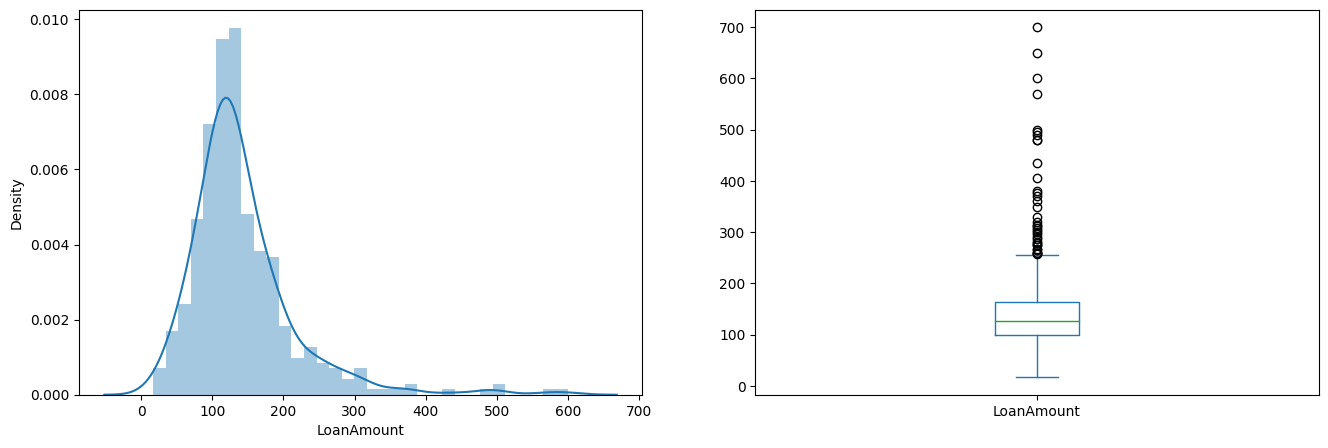

In [ ]:
plt.figure(1)
plt.subplot(121)
removeNA_df=train_df.dropna() # we need to remove Na in order to plot a density graph
sns.distplot(removeNA_df['LoanAmount']);

plt.subplot(122)
train_df['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

**Question 5:** Do you notice any outliers?



Analysis:


yes there is an outlaye (the points apove the whiskers as dots are meant to be outliers) as shown in the box plot, however these outliers is not nesecerly be removed, they may be usefull in some cases

**Question 6:** Draw the same plots for the ApplicantIncome Feature and check if there are any outliers.

<ipython-input-31-15b89fb2912a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(removeNA_df['ApplicantIncome'])


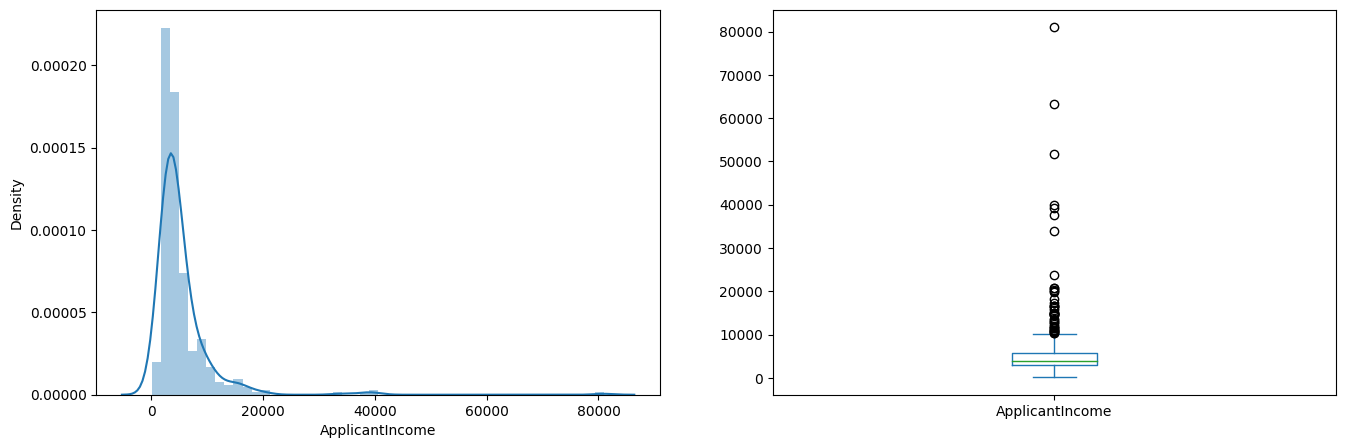

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(121) #position
sns.distplot(removeNA_df['ApplicantIncome'])

plt.subplot(122)
train_df['ApplicantIncome'].plot.box()

plt.show()




### Check if the gender affects the loan approval

Loan_Status         N         Y
Gender                         
Female       0.329787  0.670213
Male         0.300733  0.699267


<Axes: xlabel='Gender'>

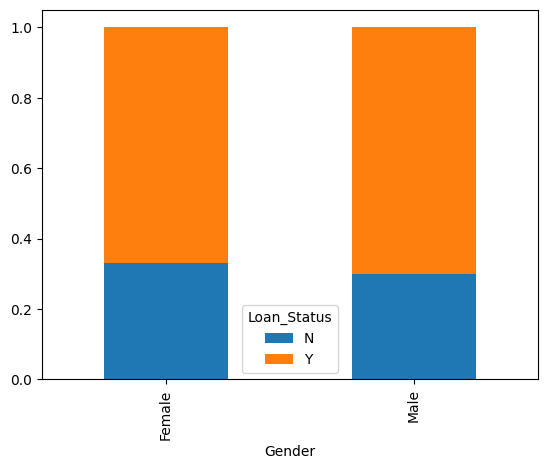

In [ ]:
Gender=pd.crosstab(train_df['Gender'],train_df['Loan_Status'], normalize='index')
print(Gender)
Gender.plot(kind='bar', stacked=True)

**Question 7:**

a. Does gender affect loan approval?

b. Suggest another method to study this relation

Analysis:

# 4. Preprocessing
"Garbage in, garbage out".
<br>
<br>
Data should be preprocessed and cleaned to get rid of noisy data. Preprocessing includes:

- remove unsued column(s)
- remove grabage data
- convert continous data into categorical
- treat missing data
- encode categorical data
- normalization: normalize data ranges for all features (e.g., between 0 and 1)

## Remove unused columns
Here we will drop some columns we beleive they do not affect the loan approval.

In [ ]:
train_df.drop(['Loan_ID','Gender','Self_Employed','ApplicantIncome','LoanAmount','Loan_Amount_Term'], inplace=True, axis=1)

##Convert continous data into categorical

In [ ]:
train_df['Credit_History'] = train_df['Credit_History'].astype('O')

## Treat missing data
- fill missing categorical data & discrete data with mode
- fill missing continous data with mean


In [ ]:
train_df['Credit_History'].fillna(train_df['Credit_History'].mode()[0], inplace=True)
train_df['Dependents'].fillna(train_df['Dependents'].mode()[0], inplace=True)
train_df['Married'].fillna(train_df['Married'].mode()[0], inplace=True)

## Check if any null value exist

**Question 8:** Write the code to check for any null values

In [ ]:

# Checking for null values in the entire DataFrame
if train_df.isnull().values.any():
    print("Null values exist in the DataFrame.")
# Check for null values in each column
null_counts = train_df.isnull().sum()

# Print the columns with null values
if null_counts.any():
    print("Columns with null values:")
    print(null_counts[null_counts > 0])

## Encode categorical data

In [ ]:
le = LabelEncoder()
cat_data=train_df[['Credit_History','Dependents','Education','Married','Property_Area','Loan_Status']]
num_data=train_df[['CoapplicantIncome']]
cat_data.head()

,Credit_History,Dependents,Education,Married,Property_Area,Loan_Status
0,1.0,0,Graduate,No,Urban,Y
1,1.0,1,Graduate,Yes,Rural,N
2,1.0,0,Graduate,Yes,Urban,Y
3,1.0,0,Not Graduate,Yes,Urban,Y
4,1.0,0,Graduate,No,Urban,Y


In [ ]:
for i in cat_data:
    cat_data[i] = le.fit_transform(cat_data[i])
cat_data.head()

<ipython-input-41-699cec605dfd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data[i] = le.fit_transform(cat_data[i])
<ipython-input-41-699cec605dfd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data[i] = le.fit_transform(cat_data[i])
<ipython-input-41-699cec605dfd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

,Credit_History,Dependents,Education,Married,Property_Area,Loan_Status
0,1,0,0,0,2,1
1,1,1,0,1,0,0
2,1,0,0,1,2,1
3,1,0,1,1,2,1
4,1,0,0,0,2,1


## Combine both cat_data and numerical_data

In [ ]:
train_df = pd.concat([cat_data, num_data], axis=1)

# Display the first few rows of the DataFrame
train_df.head()

,Credit_History,Dependents,Education,Married,Property_Area,Loan_Status,CoapplicantIncome
0,1,0,0,0,2,1,0.0
1,1,1,0,1,0,0,1508.0
2,1,0,0,1,2,1,0.0
3,1,0,1,1,2,1,2358.0
4,1,0,0,0,2,1,0.0


## Normalization

**Question 9:** Normalize data ranges for all features (e.g., between 0 and 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# the min max scalar normlize the range between 0 and 1
scalar = MinMaxScaler()
train_df = pd.DataFrame(scalar.fit_transform(train_df), columns =train_df.columns)

print(scalar.fit_transform(train_df))



[[1.         0.         0.         ... 1.         1.         0.        ]
 [1.         0.33333333 0.         ... 0.         0.         0.0754    ]
 [1.         0.         0.         ... 1.         1.         0.        ]
 ...
 [1.         0.         1.         ... 0.         0.         0.06435   ]
 [1.         0.33333333 0.         ... 0.5        1.         0.1002    ]
 [1.         0.66666667 0.         ... 1.         1.         0.10175   ]]


# 5. Training & Validating

We split the data between training and testing.
Then, we train a model to predict the loan status

In [ ]:
input_variables = ['Credit_History','Dependents','Education','Married','Property_Area','CoapplicantIncome']
x = train_df[input_variables]
y = train_df['Loan_Status']

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size =0.3)

##Creating & Fitting the model

In [ ]:
model=LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

##Validating the model

In [ ]:
pred_val = model.predict(x_val)
acc = accuracy_score(y_val,pred_val)
print('The accuracy is ', acc*100)

The accuracy is  79.87012987012987
